In [388]:
import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, make_scorer

from sklearn.preprocessing import OneHotEncoder

## Descripción del problema

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un depósito a largo plazo.

# - Cargas conjunto de datos - Paso 1 

- 1- age. Edad del cliente (numérico)
- 2- job. Tipo de trabajo (categórico)
- 3- marital. Estado civil (categórico)
- 3- education. Nivel de educación (categórico)
- 5- default. ¿Tiene crédito actualmente? (categórico)
- 5- housing. ¿Tiene un préstamo de vivienda? (categórico)
- 7- loan. ¿Tiene un préstamo personal? (categórico)
- 8- contact. Tipo de comunicación de contacto (categórico)
- 9 - month. Último mes en el que se le ha contactado (categórico)
- 10 - day_of_week. Último día en el que se le ha contactado (categórico)
- 11 -duration. Duración del contacto previo en segundos (numérico)
- 12- campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
- 13- pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
- 14- previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
- 15- poutcome. Resultado de la campaña de marketing anterior (categórico)
- 16- emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
- 17- cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
- 18- cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
- 19- euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
- 20- nr.employed. Número de empleados. Indicador trimestral (numérico)
- 21- y. TARGET. El cliente

In [389]:
df = pd.read_csv("https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv",sep=";")
df.head(11)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- Anotació: habia que separ las columnas del df haciendo: sep=";" ya que pandas estaba tomando el separador con , y por eso no lo agarraba. 

In [390]:
df.shape

(41188, 21)

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 2. Preparación y Limpieza de Datos

En este paso no es necesario hacer limpieza ya que no se presenta valores nulos y tampoco columnas duplicadas. 

# Paso 3 
 -  Análisis Univariante 

# -Análisis sobre variables categoricas 


- 1   job             41188 non-null  object 
- 2   marital         41188 non-null  object 
- 3   education       41188 non-null  object 
- 4   default         41188 non-null  object 
- 5   housing         41188 non-null  object 
- 6   loan            41188 non-null  object 
- 7   contact         41188 non-null  object 
- 8   month           41188 non-null  object 
- 9   day_of_week     41188 non-null  object 
- 14  poutcome        41188 non-null  object 
- 20  y               41188 non-null  object 
 object(11)


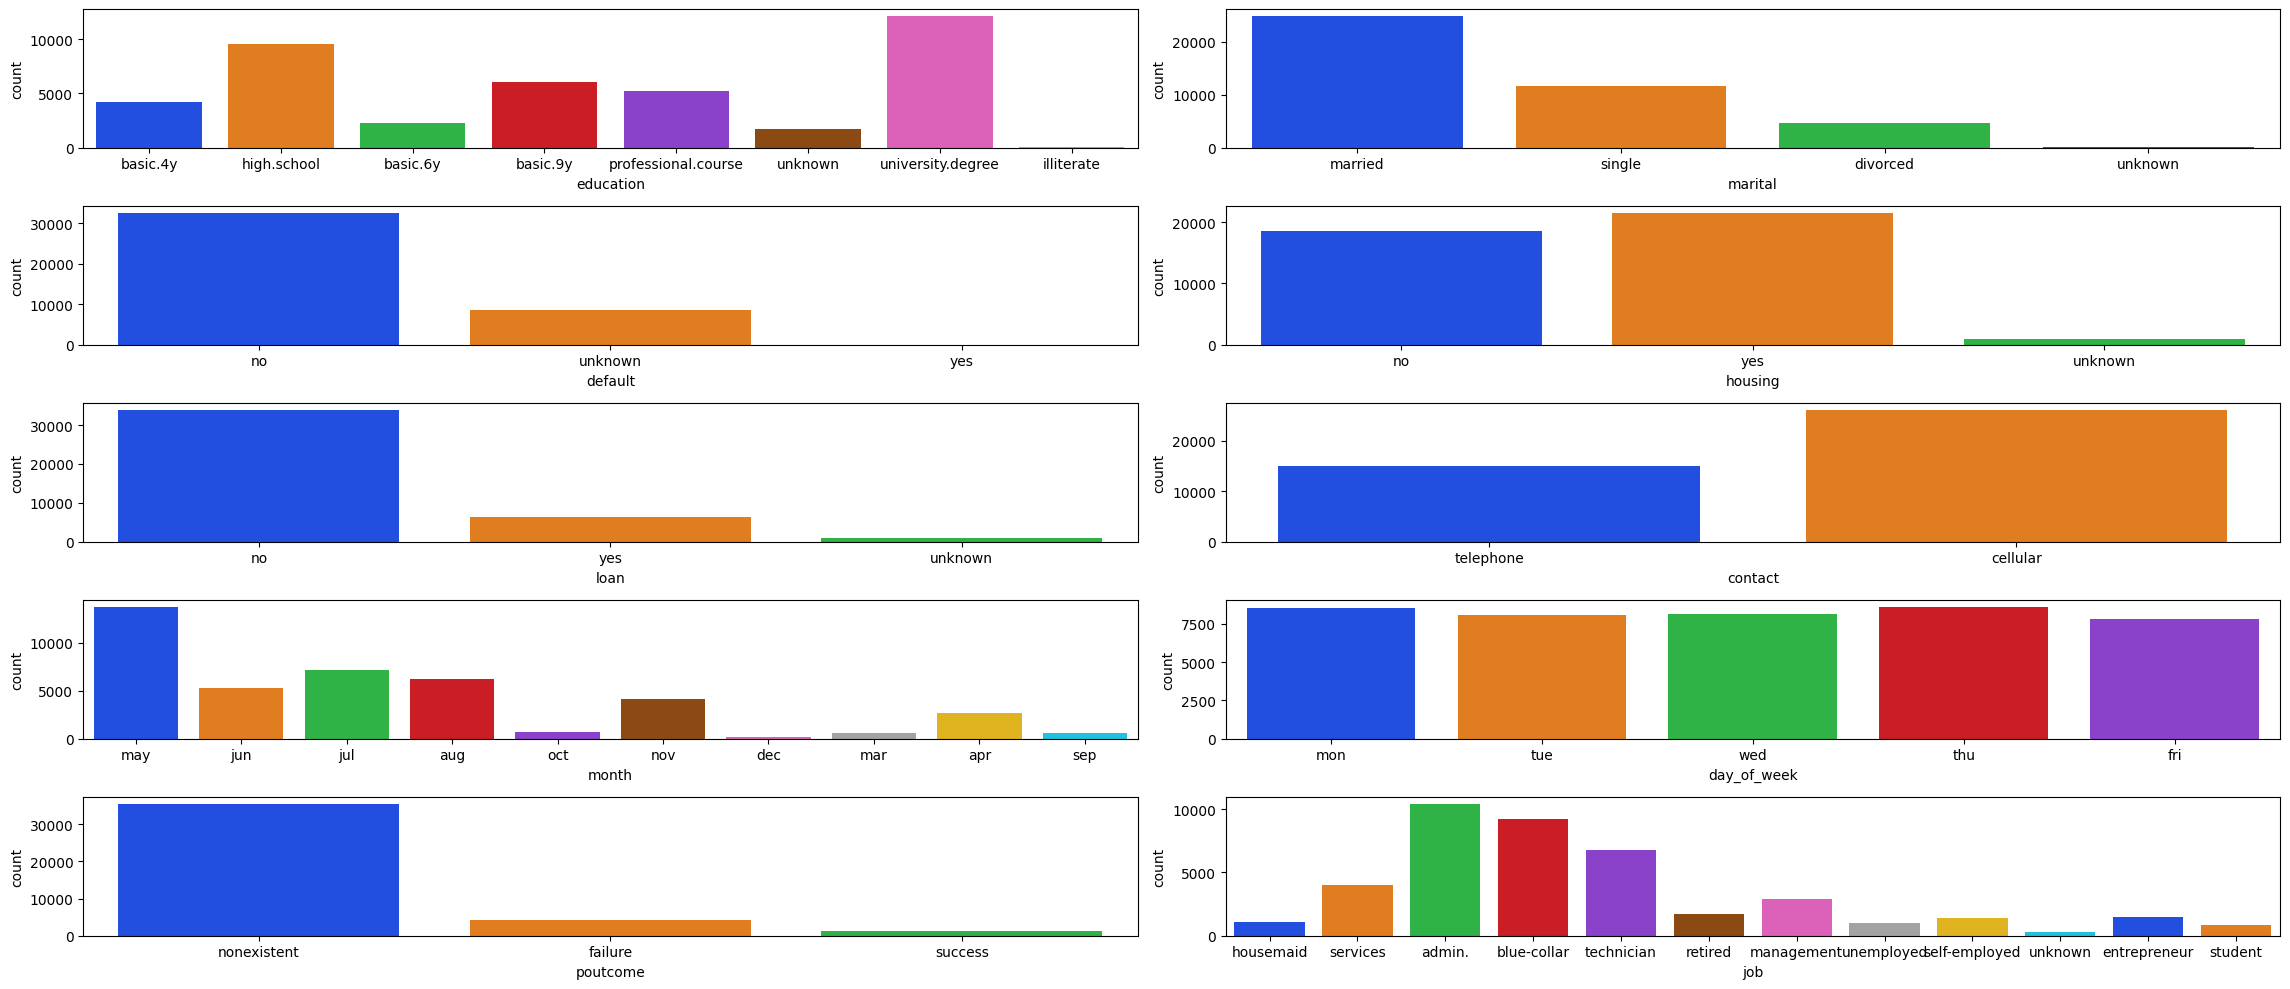

In [392]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(5, 2, figsize = (23, 10))

sns.countplot(ax = axis[0,0], data = df, x = "education", palette='bright', hue= "education", legend=False)
sns.countplot(ax = axis[0,1], data = df, x = "marital", palette='bright', hue= "marital", legend=False)
sns.countplot(ax = axis[1,0], data = df, x = "default", palette='bright', hue= "default", legend=False)
sns.countplot(ax = axis[1,1], data = df, x = "housing", palette='bright', hue= "housing", legend=False)
sns.countplot(ax = axis[2,0], data = df, x = "loan", palette='bright', hue= "loan", legend=False)
sns.countplot(ax = axis[2,1], data = df, x = "contact", palette='bright', hue= "contact", legend=False)
sns.countplot(ax = axis[3,0], data = df, x = "month", palette='bright', hue= "month", legend=False)
sns.countplot(ax = axis[3,1], data = df, x = "day_of_week", palette='bright', hue= "day_of_week", legend=False)
sns.countplot(ax = axis[4,0], data = df, x = "poutcome", palette='bright', hue= "poutcome", legend=False)
sns.countplot(ax = axis[4,1], data = df, x = "job", palette='bright', hue= "job", legend=False)
plt.tight_layout()

plt.show()

# -Análisis sobre variables numericas (histograma o diagramas de caja)
  - int

 
- 0   age             41188 non-null  int64  
- 10  duration        41188 non-null  int64  
- 11  campaign        41188 non-null  int64  
- 12  pdays           41188 non-null  int64  
- 13  previous        41188 non-null  int64  
 
 int64(5)


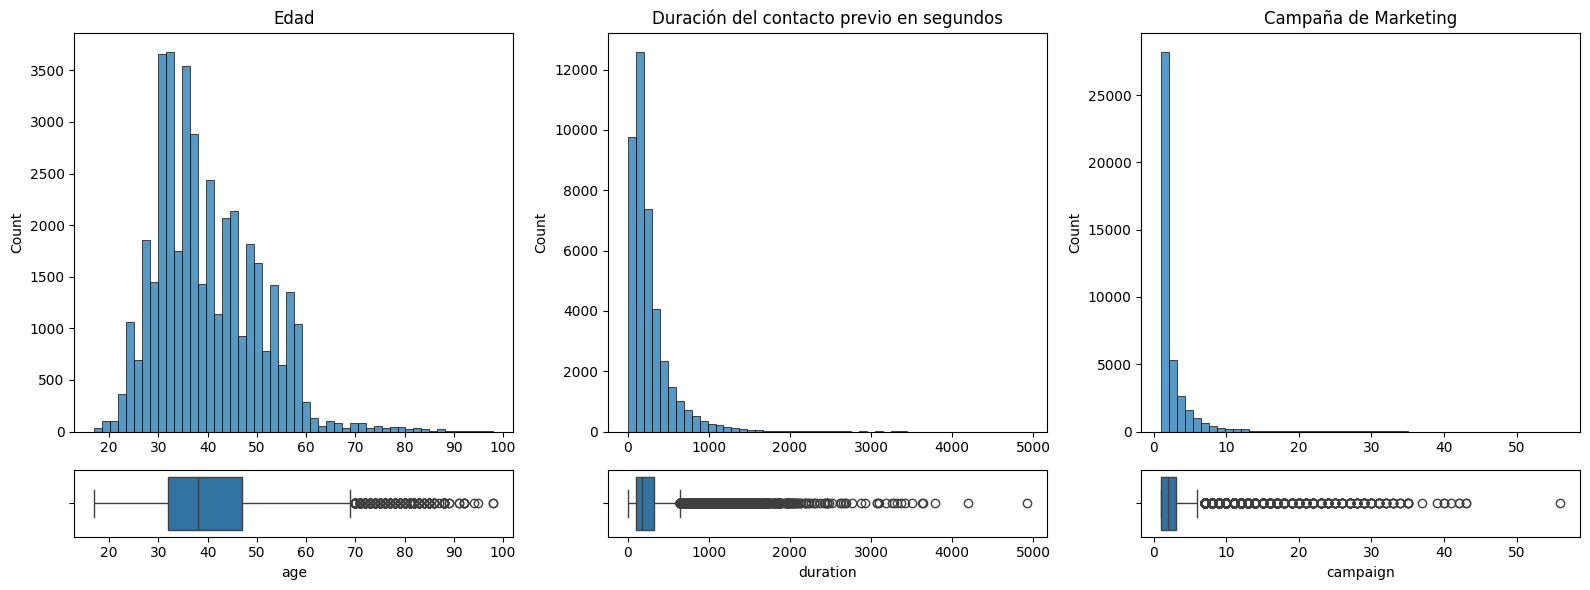

In [393]:
fig, axis = plt.subplots(2, 3, figsize = (16, 6), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0,0], data = df, x = "age", bins=50).set(title='Edad', xlabel = None)
sns.boxplot(ax = axis[1,0], data = df, x = "age")
sns.histplot(ax = axis[0,1], data = df, x = "duration", bins=50).set(title='Duración del contacto previo en segundos', xlabel = None)
sns.boxplot(ax = axis[1,1], data = df, x = "duration")
sns.histplot(ax = axis[0,2], data = df, x = "campaign", bins=50).set(title='Campaña de Marketing', xlabel = None)
sns.boxplot(ax = axis[1,2], data = df, x = "campaign")


plt.tight_layout()

plt.show()

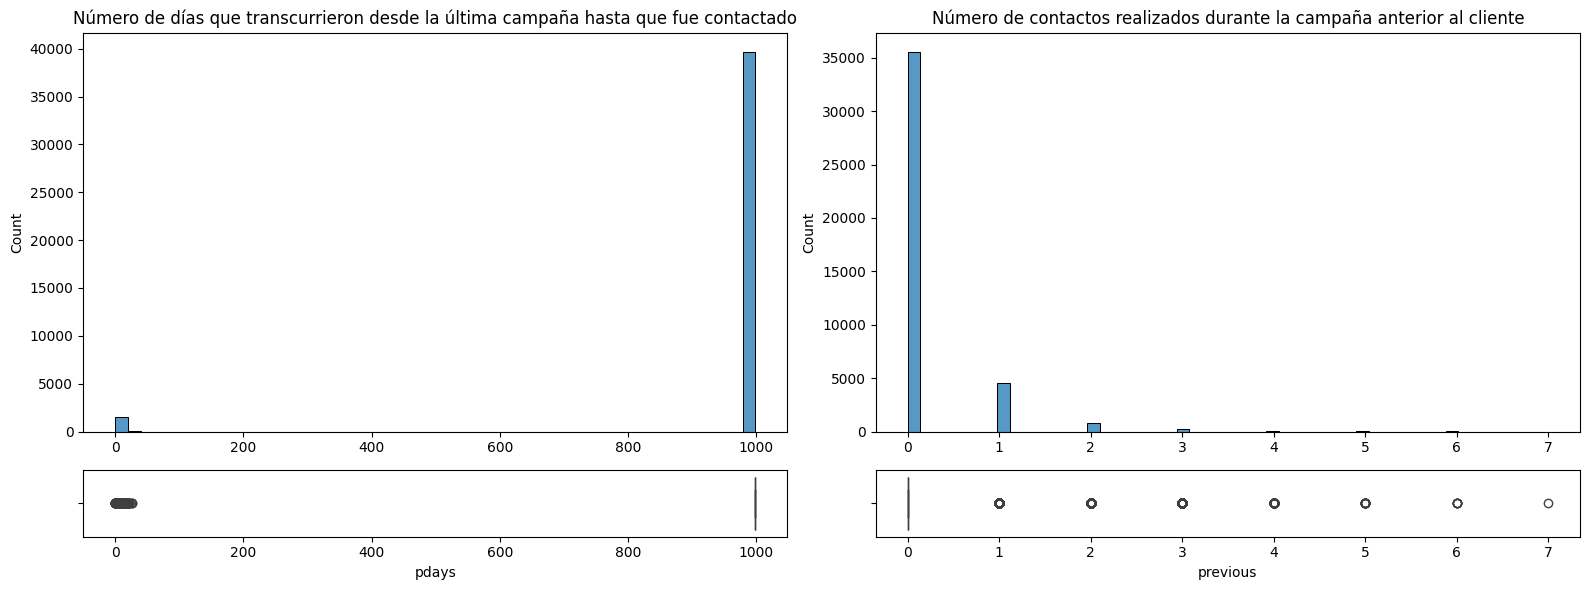

In [394]:
fig, axis = plt.subplots(2, 2, figsize = (16, 6), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0,0], data = df, x = "pdays", bins=50).set(title='Número de días que transcurrieron desde la última campaña hasta que fue contactado', xlabel = None)
sns.boxplot(ax = axis[1,0], data = df, x = "pdays")
sns.histplot(ax = axis[0,1], data = df, x = "previous", bins=50).set(title='Número de contactos realizados durante la campaña anterior al cliente', xlabel = None)
sns.boxplot(ax = axis[1,1], data = df, x = "previous")

plt.tight_layout()
plt.show()

# -Análisis sobre variables numericas ( diagramas de caja)
  - Float 
  
 - 15  emp.var.rate    41188 non-null  float64
 - 16  cons.price.idx  41188 non-null  float64
 - 17  cons.conf.idx   41188 non-null  float64
 - 18  euribor3m       41188 non-null  float64
 - 19  nr.employed     41188 non-null  float64
 
dtypes: float64(5)

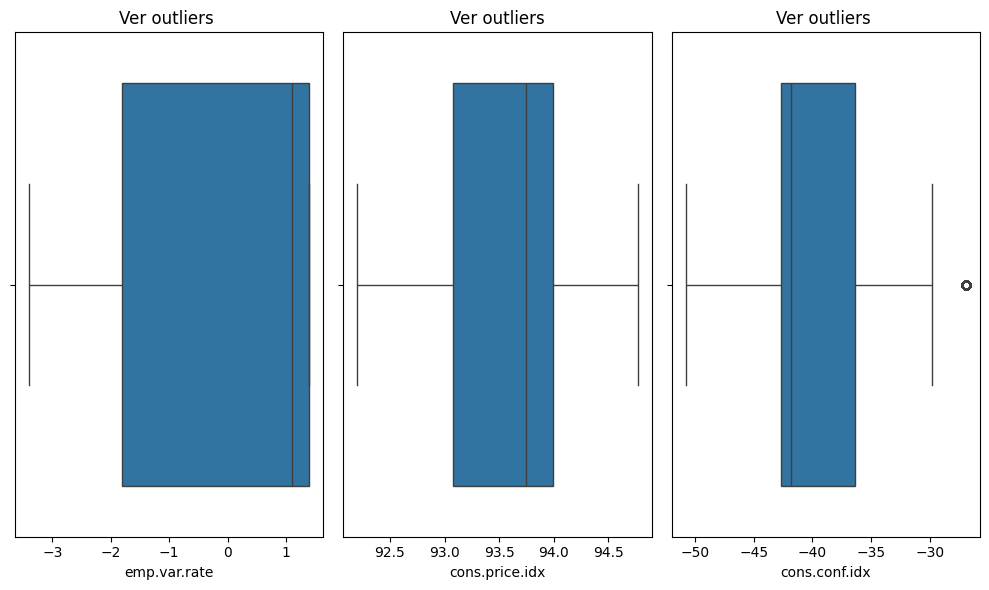

In [395]:
fig, axis = plt.subplots(1, 3, figsize = (10, 6))
sns.boxplot(ax = axis[0], data = df, x = "emp.var.rate").set(title='Ver outliers ')
sns.boxplot(ax = axis[1], data = df, x = "cons.price.idx").set(title='Ver outliers')
sns.boxplot(ax = axis[2], data = df, x = "cons.conf.idx").set(title='Ver outliers ')

plt.tight_layout()
plt.show()

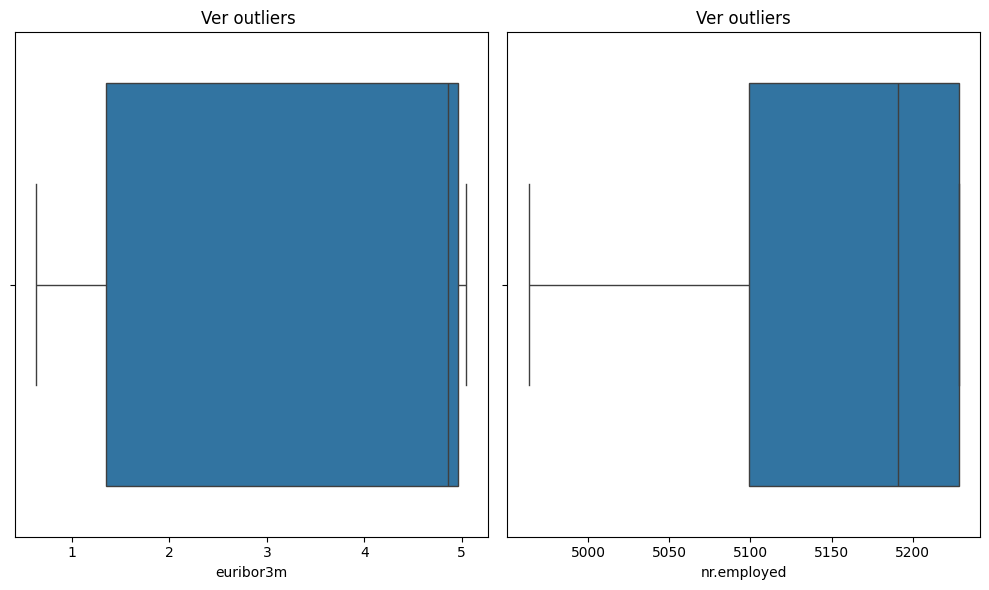

In [396]:
fig, axis = plt.subplots(1, 2, figsize = (10, 6))
sns.boxplot(ax = axis[0], data = df, x = "euribor3m").set(title='Ver outliers ')
sns.boxplot(ax = axis[1], data = df, x = "nr.employed").set(title='Ver outliers')


plt.tight_layout()
plt.show()

# Paso 4 
# Análisis Multivariante (Relacionar las variables entre ellas)

- Nuestra variable a relacionar sera Cliente
  - Al ser mi variable objetivo binaria para este caso es mejor relacionar las variables categoricas con un gráfico de barras ya que muestra directamente probabilidad de suscripción por cada categoría.
  - Ya que los modelos solo leen solo procesan números hay que cambiar la respuest de nuestra variable objetivo a numneros. 

In [397]:
df['y_numeros'] = df['y'].map({'no': 0, 'yes': 1})

C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')
C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')


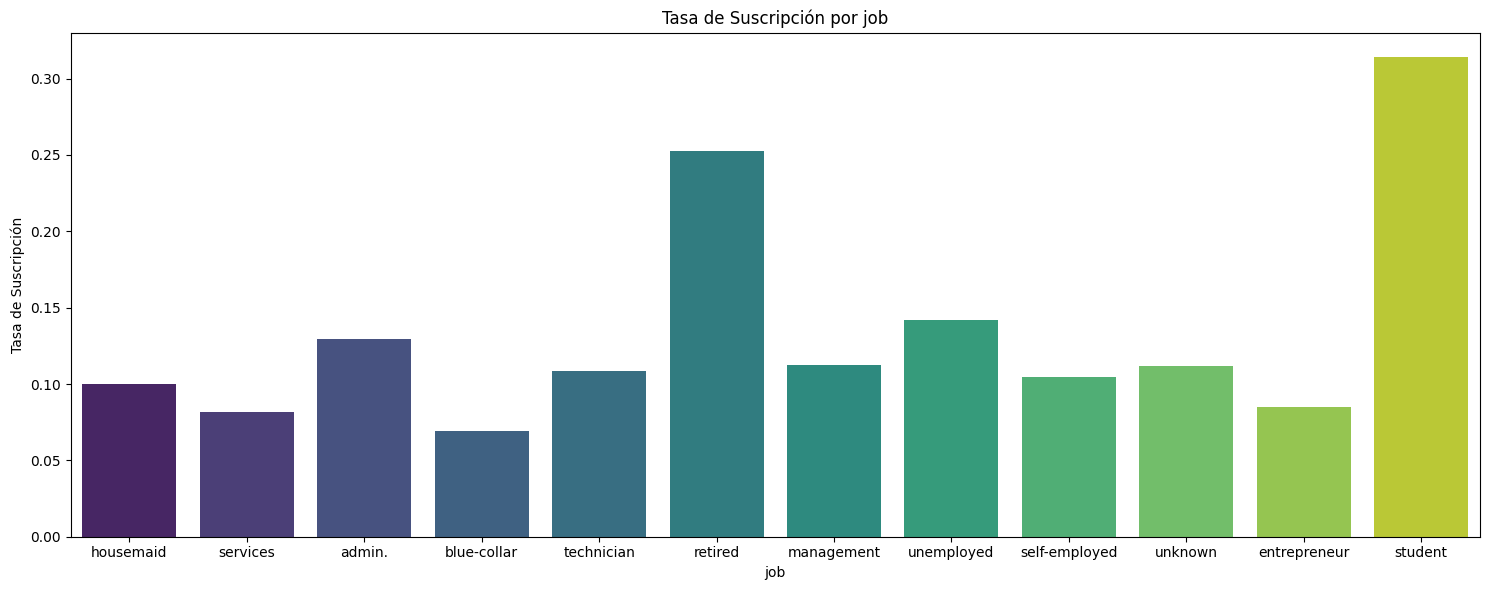

C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')
C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')


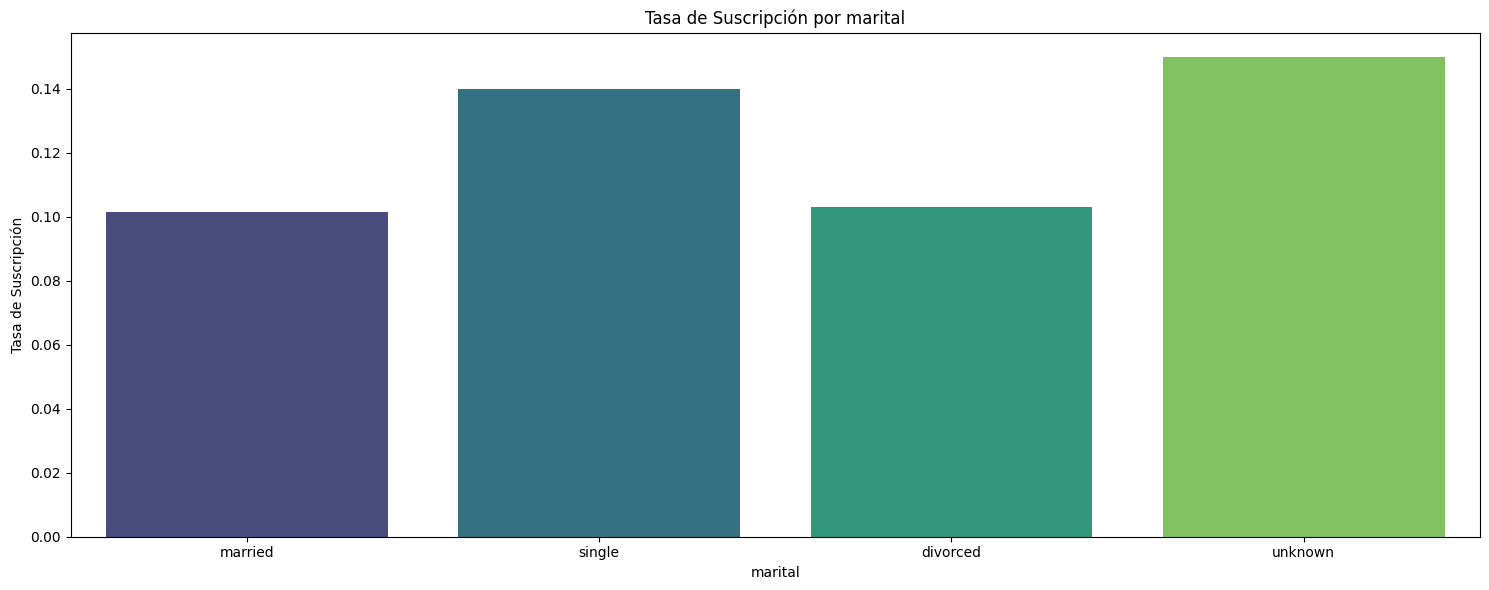

C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')
C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')


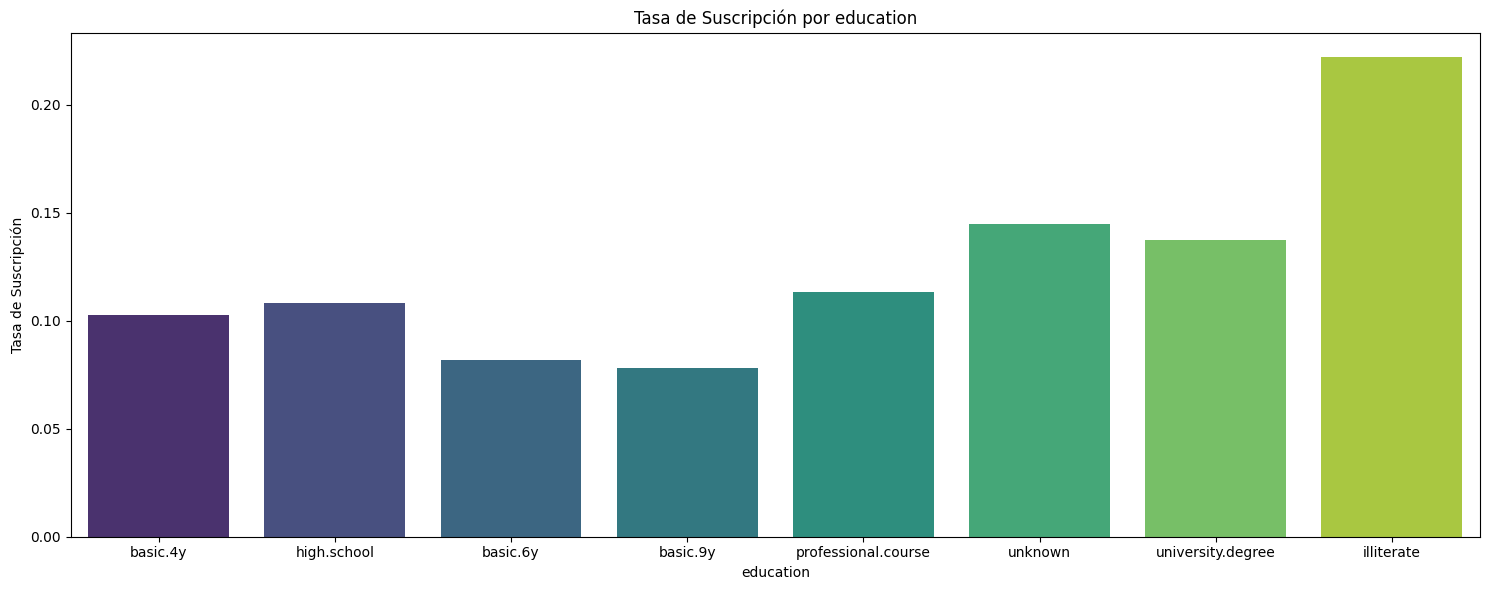

C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')
C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')


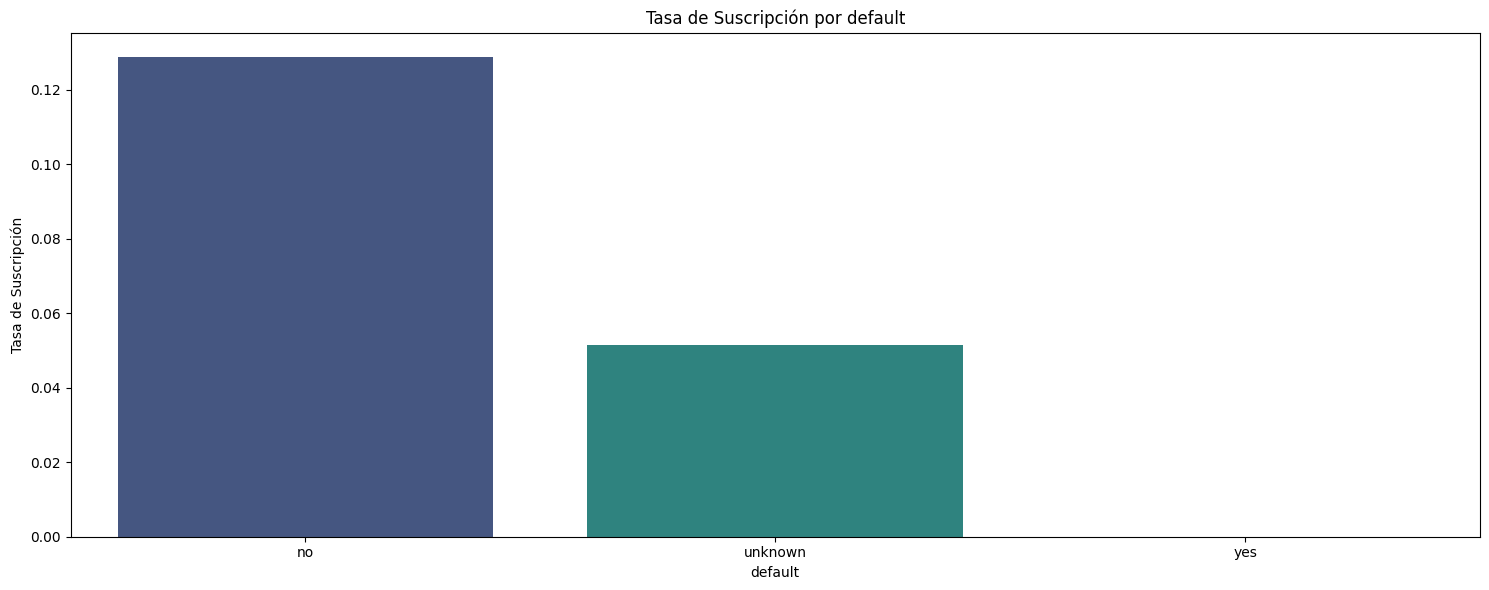

C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')
C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')


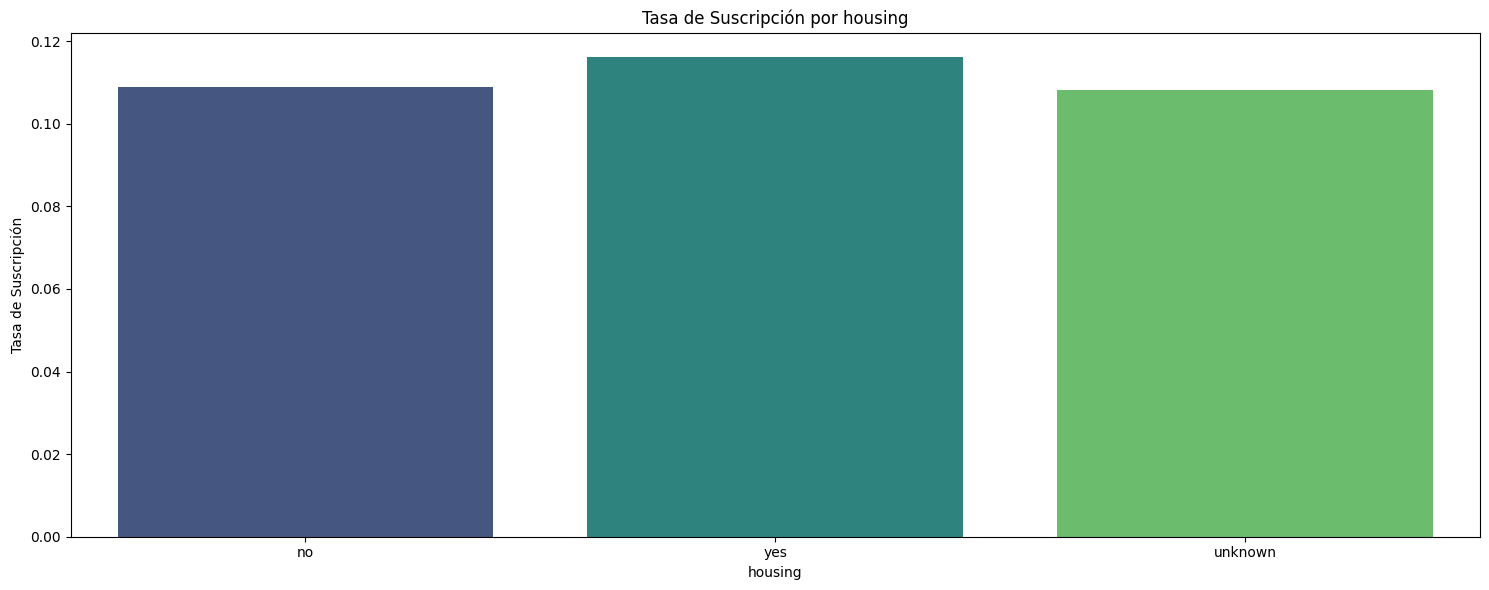

C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')
C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')


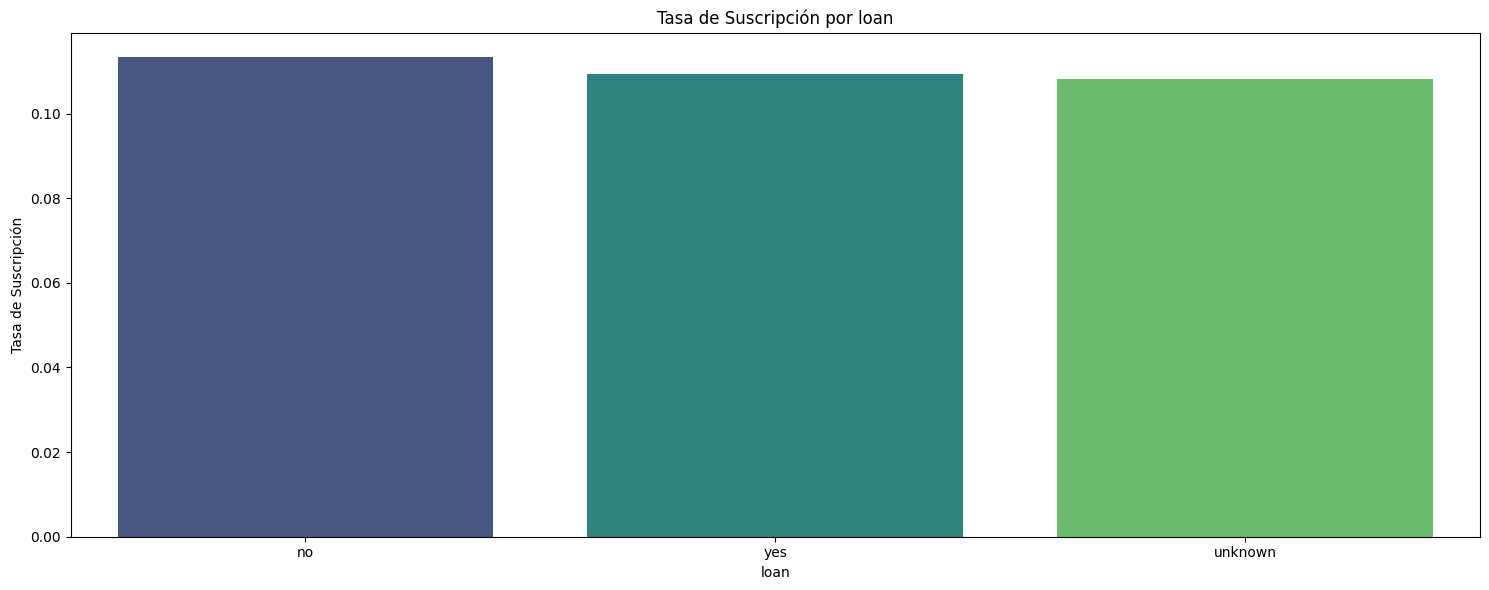

C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')
C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')


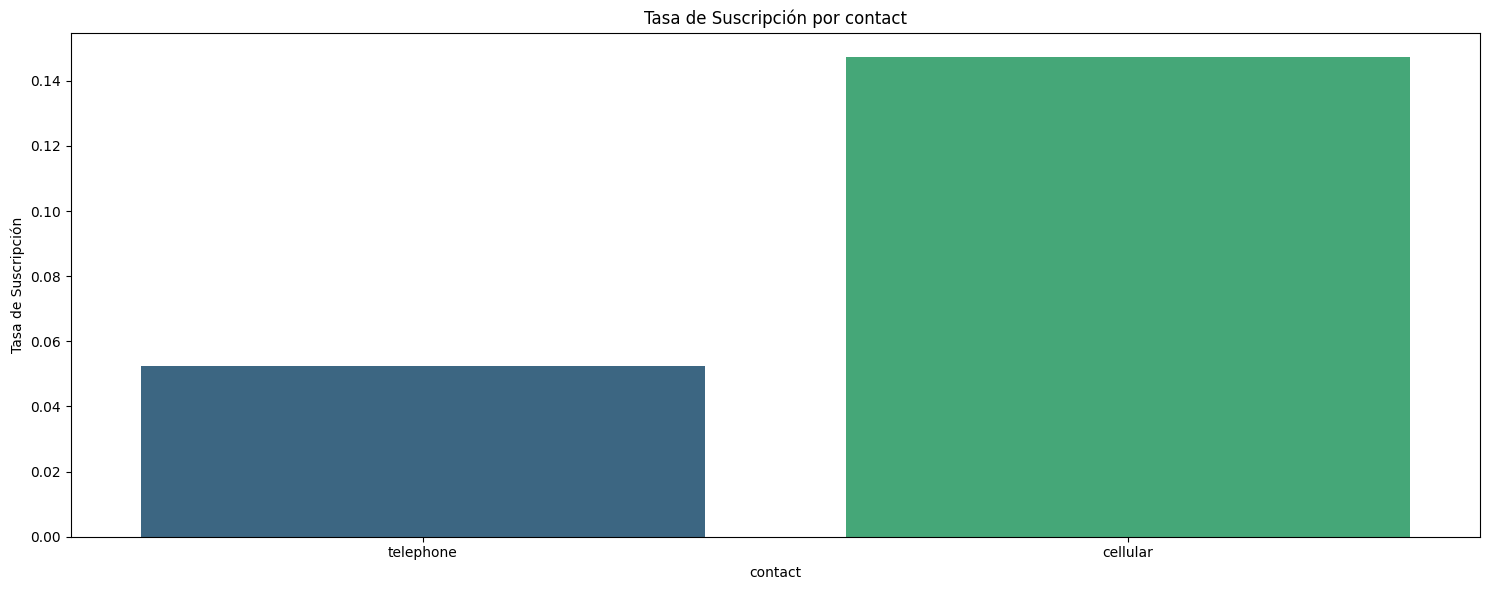

C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')
C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')


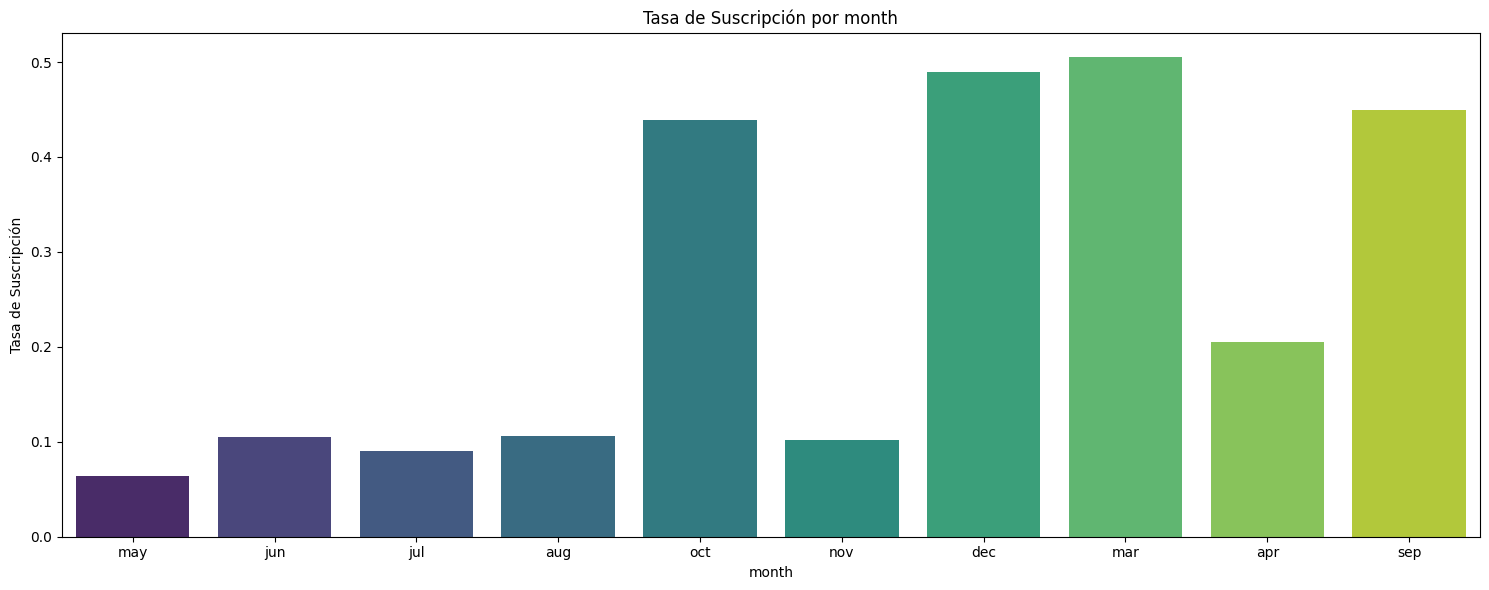

C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')
C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')


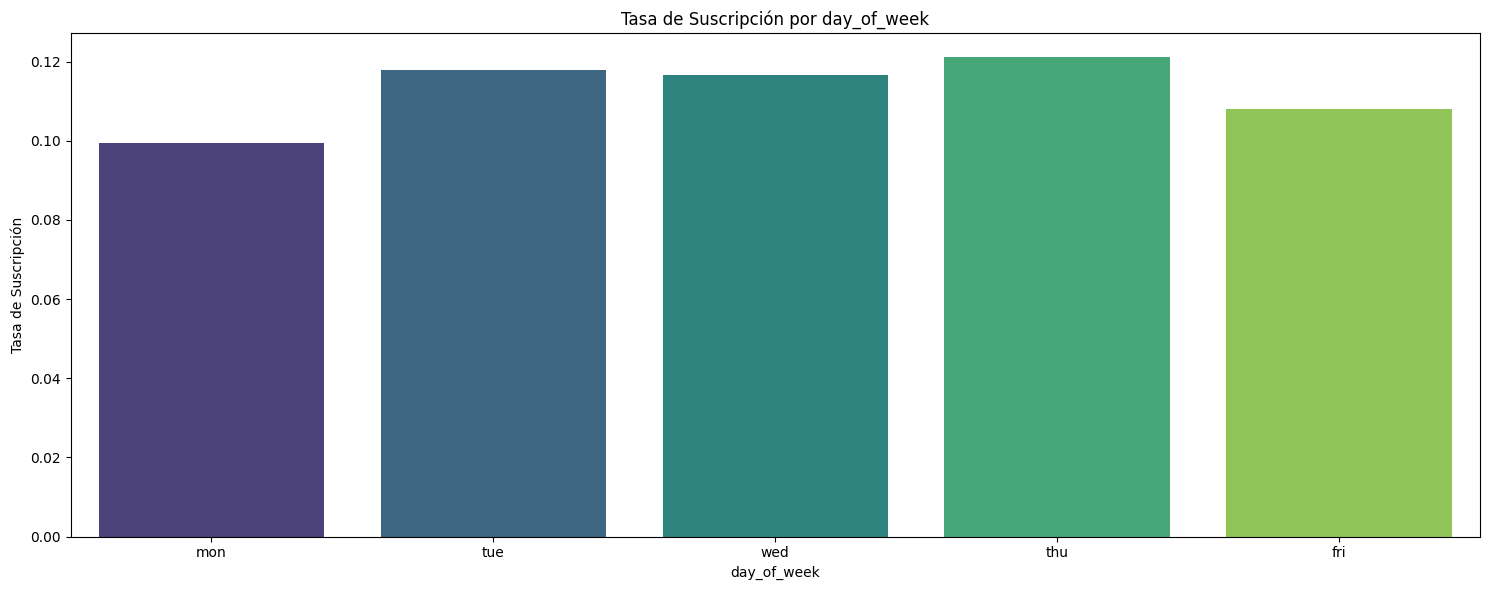

C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')
C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_24144\1295482050.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis')


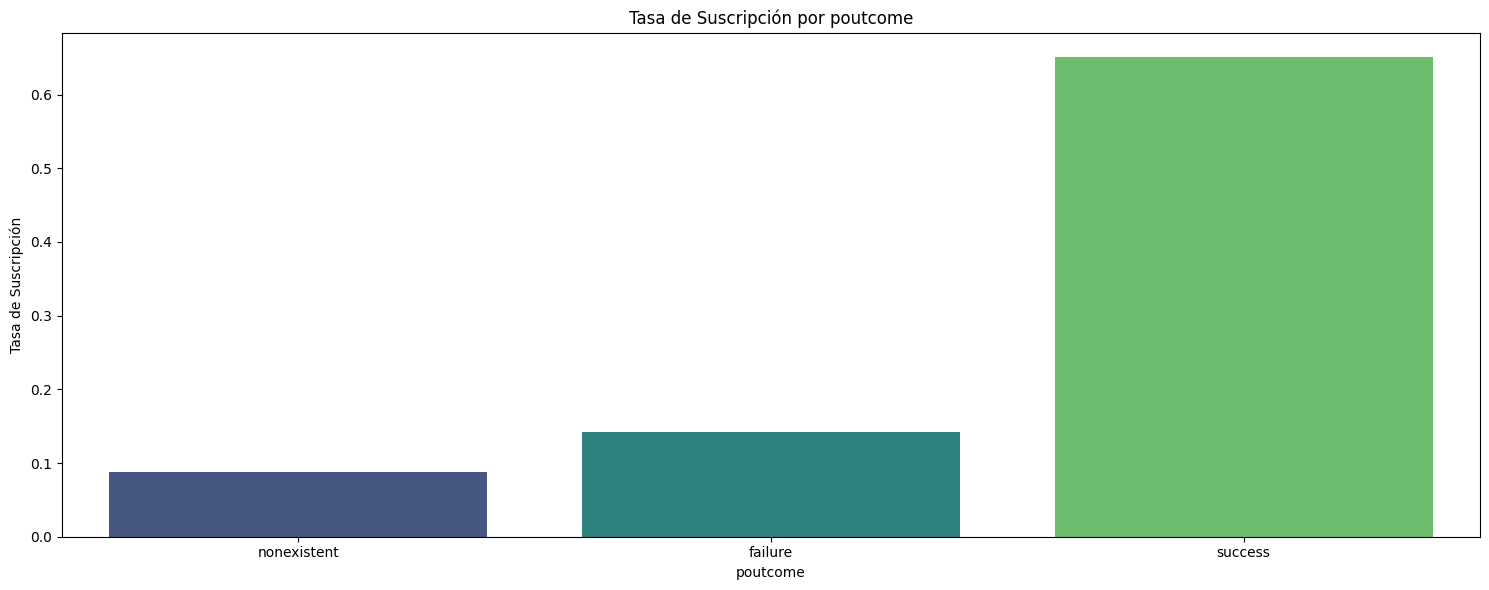

In [398]:

categorias_comparar = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for i in categorias_comparar:
    plt.figure(figsize=(15, 6))
    
    
    sns.barplot(data=df, x=i, y='y_numeros', ci=None, palette='viridis') 
    
    plt.title(f'Tasa de Suscripción por {i}')
    plt.ylabel('Tasa de Suscripción')
    
    
    plt.tight_layout()
    plt.show()

# Númerica vs Númerica , importnate hay que sacar la matriz de correlacion entre las variables antes de graficar con el objetivo de predecir 

 - Paso 1: Creo una lista donde voy a meter las variables a relacionar 
 - Paso 2: Hacemos la matriz de correlacion utilizando la funcion .corr()
 - Paso 3: realizamos el mapa de calor que nos dira que relacion hay o no 

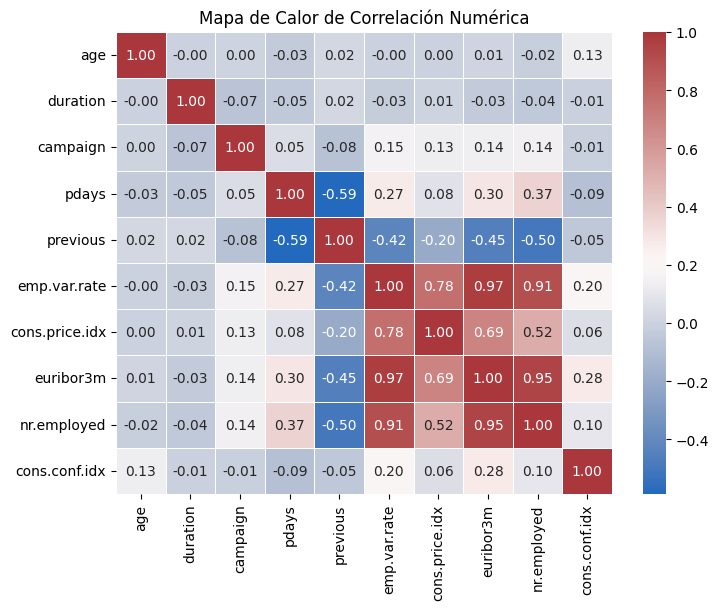

In [399]:

variables_relacion = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'cons.conf.idx']
matriz_correlacion = df[variables_relacion].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True,fmt=".2f",cmap='vlag',linewidths=.5)
plt.title('Mapa de Calor de Correlación Numérica')
plt.show()

# Paso 5 
 - 

In [ ]:

df.drop('duration', axis=1, inplace=True)
print("✅ Columna 'duration' eliminada.")

✅ Columna 'duration' eliminada.


In [401]:

variables_a_eliminar = ['euribor3m', 'nr.employed', 'cons.price.idx']
df.drop(variables_a_eliminar, axis=1, inplace=True)
print(f"✅ Variables económicas redundantes eliminadas: {variables_a_eliminar}")

✅ Variables económicas redundantes eliminadas: ['euribor3m', 'nr.employed', 'cons.price.idx']


# Paso 6 - División de datos 

In [402]:

X = df.drop('y_numeros', axis=1) 
y = df['y_numeros']             

X_train, X_value, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Paso 7 - Codificación One-Hot de VARIABLES Categóricas

In [403]:

categoricas_codi = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_encoder.fit(X_train[categoricas_codi])

X_matriz_de_numeros_train = onehot_encoder.transform(X_train[categoricas_codi])
X_convertir_catgoricas_en_pandas = pd.DataFrame(X_matriz_de_numeros_train, index = X_train.index, columns=onehot_encoder.get_feature_names_out(categoricas_codi))

X_matriz_de_numeros_value = onehot_encoder.transform(X_value[categoricas_codi])
X_value_codificado = pd.DataFrame(X_matriz_de_numeros_value, index = X_value.index, columns=onehot_encoder.get_feature_names_out(categoricas_codi))

# Paso 8 - Escalado de Datos Numéricos 

In [404]:
# Forma para agregar las variables de tipo
variables_a_escalar = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
scaler.fit(X_train[variables_a_escalar])

X_escalado_xtrain= scaler.fit_transform(X_train[variables_a_escalar])
X_panda_escalado_entreno = pd.DataFrame(X_escalado_xtrain, index = X_train.index, columns = variables_a_escalar)

X_escalado_x_value = scaler.transform(X_value[variables_a_escalar])
X_value_escalado_entreno = pd.DataFrame(X_escalado_x_value, index = X_value.index, columns = variables_a_escalar)


# Paso 9 - Combinacion final de datos 

In [405]:
X_train_final = pd.concat([X_convertir_catgoricas_en_pandas, X_panda_escalado_entreno], axis=1)
X_value_final = pd.concat([X_value_codificado, X_value_escalado_entreno], axis=1)

# Construcción del Modelo de Regresión Logística
 - Definir el modelo base 
 - Entrenar el modelo
 - Predición

In [406]:

model_lr_default = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced' ) 


model_lr_default.fit(X_train_final, y_train)


y_pred_test = model_lr_default.predict(X_value_final)




#  Optimización del Modelo de Regresión Logística
   
   - Definiremos las métricas del negocio 
   - Definir los hyperparametros
   - Inicializar el Modelo a utilizar
   - 

In [ ]:

f1_scorer = make_scorer(f1_score, pos_label=1)

hyperparams = {"C": [0.01, 0.1, 1, 10, 100],"solver": ["liblinear", "saga"], "penalty": ["l1", "l2"], "class_weight": ['balanced'] }

grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=500), param_grid=hyperparams, scoring=f1_scorer, cv=5, verbose=1, n_jobs=-1 )

grid_search.fit(X_train_final, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


- Lo que veo  es que el modelo de Regresión Logística que salió mejor del GridSearch se basa en una regularización L1  con un valor de C=0.1. 
Esto significa que el modelo es bastante estricto y va a ignorar automáticamente las variables menos importantes para centrarse solo en las características clave que realmente predicen si el cliente se suscribe o no.

# Evaluar el rendimiento del modelo optimizado.

In [ ]:

mejores_parametros = {'C': 0.1, 'penalty': 'l1', 'solver': 'saga', 'class_weight': 'balanced'}

model_lr_optimo = LogisticRegression(random_state=42, max_iter=500)
model_lr_optimo.fit(X_train_final, y_train)

y_pred_optimizado = model_lr_optimo.predict(X_value_final)

score_final = f1_score(y_test, y_pred_optimizado, pos_label=1) 

Tasa_de_Verdaderos_Positivos = classification_report(y_test, y_pred_optimizado, output_dict=True)['1']['recall']

print(score_final)
print(Tasa_de_Verdaderos_Positivos)

0.30691964285714285
0.19755747126436782
